 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [180]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [110]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns_df = pd.read_csv(whale_returns_csv, delimiter=',', index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns_df.sort_index(axis='columns', inplace=True)
whale_returns_df.head()

,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.006569,-0.004981,-0.001266,-0.000496
2015-03-04,0.004213,0.003241,0.002230,-0.002534
2015-03-05,0.006726,0.004076,0.004016,0.002355
2015-03-06,-0.013098,-0.003574,-0.007905,-0.008481


In [111]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isnull().sum()

BERKSHIRE HATHAWAY INC         1
PAULSON &amp; CO.INC.              1
SOROS FUND MANAGEMENT LLC      1
TIGER GLOBAL MANAGEMENT LLC    1
dtype: int64

In [112]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

BERKSHIRE HATHAWAY INC         0
PAULSON &amp; CO.INC.              0
SOROS FUND MANAGEMENT LLC      0
TIGER GLOBAL MANAGEMENT LLC    0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [113]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv(algo_returns_csv, delimiter=',', index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns_df.sort_index(axis='columns', inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [114]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [115]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [188]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("./Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
pd.to_datetime(sp500_history_df.index)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [189]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df.dtypes

Close    object
dtype: object

In [190]:
# Fix Data Types
# YOUR CODE HERE
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df.dtypes

Close    float64
dtype: object

In [191]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_history_df.sort_index(inplace=True)
sp500_returns = sp500_history_df.pct_change()
sp500_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [192]:
# Drop nulls
# YOUR CODE HERE
print(sp500_returns.isnull().sum())
sp500_returns.dropna(inplace=True)
print(sp500_returns.isnull().sum())

Close    1
dtype: int64
Close    0
dtype: int64


In [193]:
# Rename Column
# YOUR CODE HERE
sp500_returns.rename(columns={'Close':'S&P 500'}, inplace=True)
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [203]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
port_returns = pd.concat([whale_returns_df, algo_returns_df, sp500_returns], axis='columns', join='inner')
port_returns

,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.006569,-0.004981,-0.001266,-0.000496,-0.001942,-0.000949,-0.004539
2015-03-04,0.004213,0.003241,0.002230,-0.002534,-0.008589,0.002416,-0.004389
2015-03-05,0.006726,0.004076,0.004016,0.002355,-0.000955,0.004323,0.001196
2015-03-06,-0.013098,-0.003574,-0.007905,-0.008481,-0.004957,-0.011460,-0.014174
2015-03-09,-0.001652,0.004225,0.000582,0.005843,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.000837,0.000388,0.002699,-0.000831,-0.006945,0.002899,0.000509
2019-04-17,0.003222,-0.006467,-0.002897,-0.004409,-0.010301,-0.005228,-0.002274
2019-04-18,0.001916,0.001222,0.001448,0.000582,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

&lt;matplotlib.axes._subplots.AxesSubplot at 0x20e7447c8e0&gt;

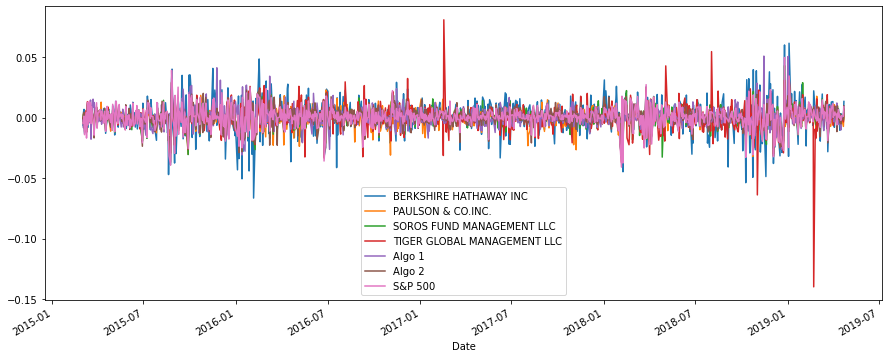

In [204]:
# Plot daily returns
# YOUR CODE HERE
port_returns.plot(figsize=(15, 6))

&lt;matplotlib.axes._subplots.AxesSubplot at 0x20e022e5640&gt;

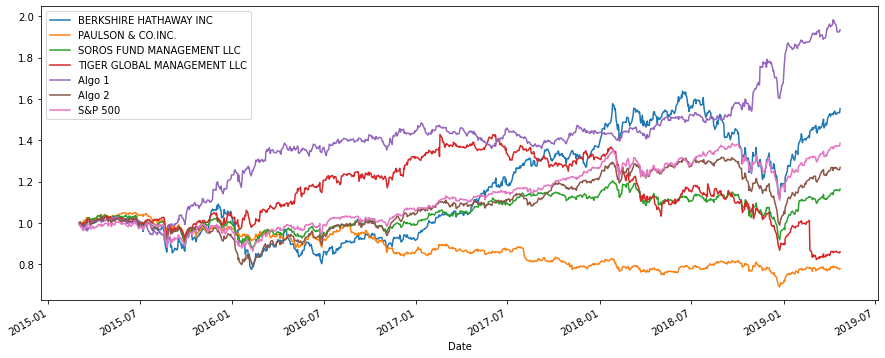

In [315]:
# Plot cumulative returns
# YOUR CODE HERE
cum_returns = (1 + port_returns).cumprod()
cum_returns.plot(figsize=(15, 6))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

&lt;matplotlib.axes._subplots.AxesSubplot at 0x20e76e645b0&gt;

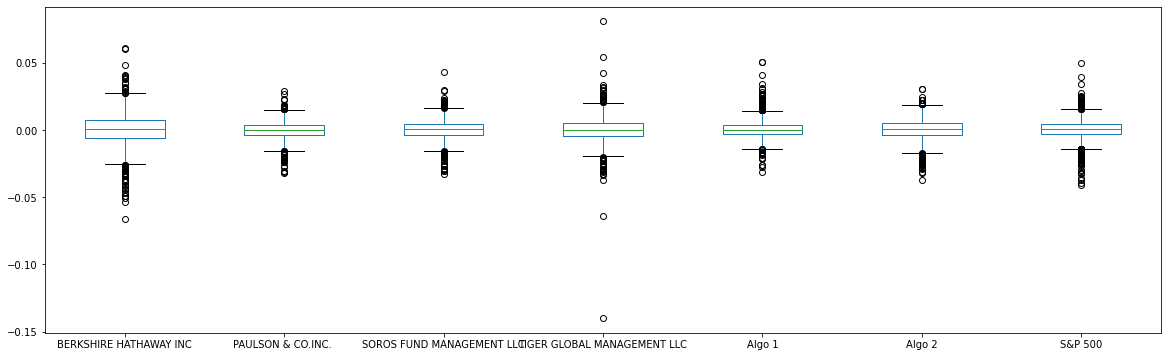

In [224]:
# Box plot to visually show risk
# YOUR CODE HERE
port_returns.plot(kind='box', figsize=(20, 6))

In [225]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
port_risk = np.std(port_returns)
port_risk

BERKSHIRE HATHAWAY INC         0.012912
PAULSON &amp; CO.INC.              0.007020
SOROS FUND MANAGEMENT LLC      0.007892
TIGER GLOBAL MANAGEMENT LLC    0.010889
Algo 1                         0.007617
Algo 2                         0.008338
S&amp;P 500                        0.008550
dtype: float64

In [227]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
port_risk > port_risk['S&P 500']

# From the output below -- Berkshire and Tiger are both riskier than the S&P500

BERKSHIRE HATHAWAY INC          True
PAULSON &amp; CO.INC.              False
SOROS FUND MANAGEMENT LLC      False
TIGER GLOBAL MANAGEMENT LLC     True
Algo 1                         False
Algo 2                         False
S&amp;P 500                        False
dtype: bool

In [230]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = (port_risk * np.sqrt(252))
annualized_std

BERKSHIRE HATHAWAY INC         0.204978
PAULSON &amp; CO.INC.              0.111434
SOROS FUND MANAGEMENT LLC      0.125275
TIGER GLOBAL MANAGEMENT LLC    0.172853
Algo 1                         0.120909
Algo 2                         0.132366
S&amp;P 500                        0.135721
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

&lt;matplotlib.axes._subplots.AxesSubplot at 0x20e786c27c0&gt;

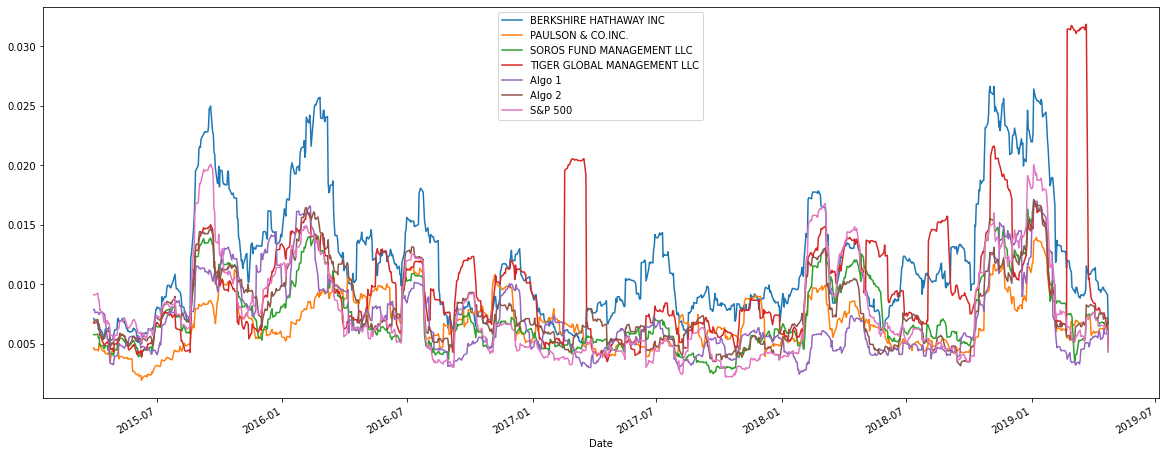

In [239]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
port_returns.rolling(window=21).std().plot(figsize=(20, 8))

# From the plot below, it does look like risk for the various different portfolios increase when s&p500 risk increases...**HOWEVER** the opposite does not hold true


AxesSubplot(0.125,0.125;0.62x0.755)


,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC,Algo 1,Algo 2,S&P 500
BERKSHIRE HATHAWAY INC,1.000000,0.545623,0.754360,0.424423,0.292033,0.688082,0.751371
PAULSON & CO.INC.,0.545623,1.000000,0.699914,0.434479,0.268840,0.678152,0.669732
SOROS FUND MANAGEMENT LLC,0.754360,0.699914,1.000000,0.561243,0.321211,0.826873,0.837864
TIGER GLOBAL MANAGEMENT LLC,0.424423,0.434479,0.561243,1.000000,0.164387,0.507414,0.623946
Algo 1,0.292033,0.268840,0.321211,0.164387,1.000000,0.288243,0.279494
Algo 2,0.688082,0.678152,0.826873,0.507414,0.288243,1.000000,0.858764
S&P 500,0.751371,0.669732,0.837864,0.623946,0.279494,0.858764,1.000000


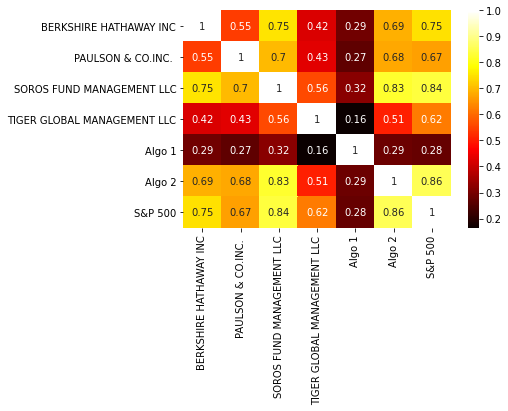

In [342]:
# Construct a correlation table
# YOUR CODE HERE
correlation = port_returns.corr()
import seaborn as sns
print(sns.heatmap(correlation, annot=True, cmap='hot'))
correlation

## From the heatmap below Algo 2 and Soros Fund Management are most closely tied with the S&P 500

&lt;matplotlib.axes._subplots.AxesSubplot at 0x20e0675f7c0&gt;

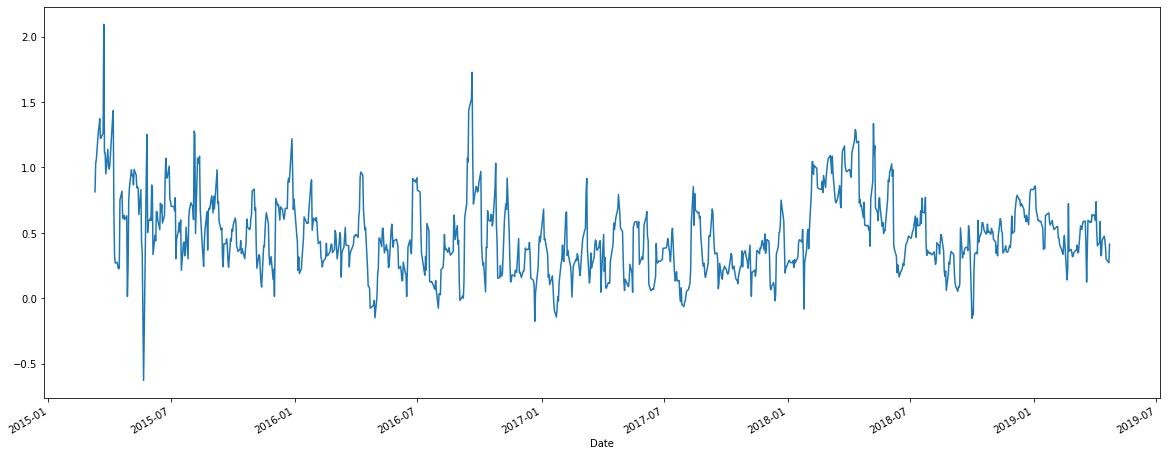

In [350]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
# beta = covariance / variance  **OR**  beta = df1.cov(df2) / df1.var()

# set your rolling window timeframe, in days
window = 7

berkshire = port_returns['BERKSHIRE HATHAWAY INC']
sp500 = port_returns['S&P 500']

roll_covariance = berkshire.rolling(window=window).cov(sp500)
roll_variance = berkshire.rolling(window=window).var()

roll_beta = roll_covariance / roll_variance
roll_beta.plot(figsize=(20, 8))

# From the plot below, besides a few spikes, the 7-day Beta averages right about 0.5 suggesting that this portfolio is fairly loosely tied to the S&P 500

&lt;matplotlib.axes._subplots.AxesSubplot at 0x20e71ca9400&gt;

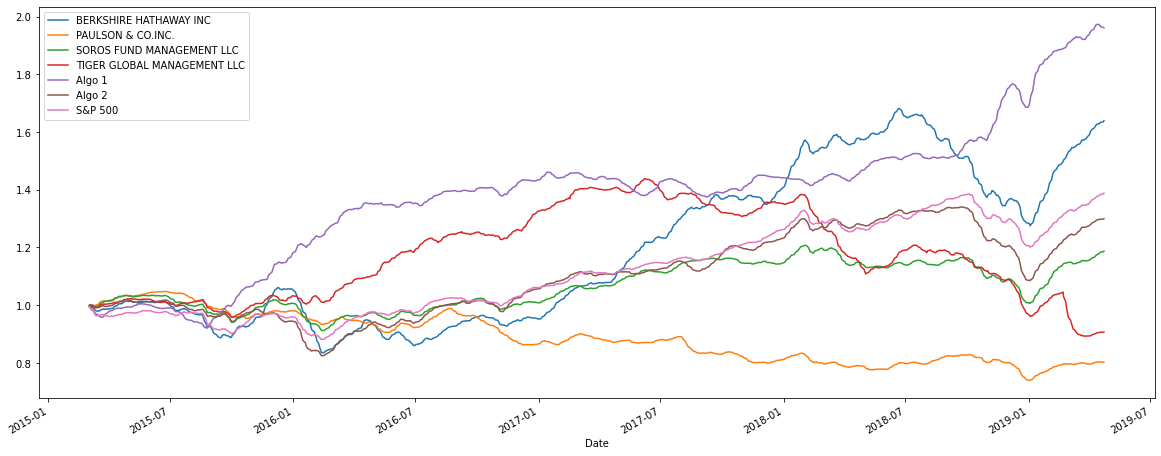

In [323]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
window = 30
alpha = (window - 1)/2

ewma = port_returns.ewm(span=alpha).mean()

cum_ewma = (1 + ewma).cumprod()

cum_ewma.plot(figsize=(20, 8))

# I was curious to see if the ewma matched up to the actual data (i.e.- shows more lag as you make the window longer) so I tested it on the S&P 500 data and it appears to work -- my code is below (just be sure to comment out the cum_ewma plot command above this comment):
# cum_ewma['S&P 500'].plot(figsize=(20, 8))
# cum_returns['S&P 500'].plot(figsize=(20, 8))



---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [358]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE

# What risk free rate do we assume?  The return of the S&P?  For now, Rf is assumed to be zero
# shapre ratio = annualized return - risk free rate / annualized std

# risk_free = port_returns['S&P 500'].mean() * 252
risk_free = 0
sharpe_ratio = ((port_returns.mean() * 252) - risk_free) / annualized_std
sharpe_ratio

BERKSHIRE HATHAWAY INC         0.622108
PAULSON &amp; CO.INC.             -0.483802
SOROS FUND MANAGEMENT LLC      0.356588
TIGER GLOBAL MANAGEMENT LLC   -0.121118
Algo 1                         1.379310
Algo 2                         0.501604
S&amp;P 500                        0.648578
dtype: float64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x20e0572b400&gt;

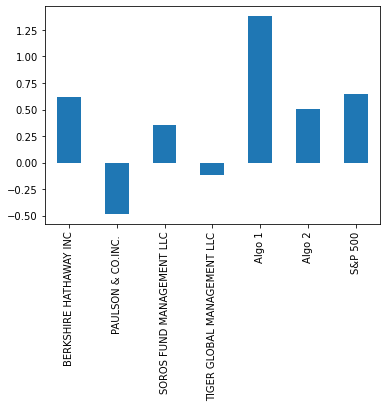

In [359]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratio.plot(kind='bar')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: 

Algo 1 outperforms both by quite a margin!  Algo 2 is only beaten by the S&P 500 and Berkshire

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [385]:
# Read the first stock
# YOUR CODE HERE
cost_df = pd.read_csv('./Resources/cost_historical.csv', index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_df.drop(columns='Symbol', inplace=True)
cost_df.rename(columns={'NOCP':'cost'}, inplace=True)
cost_df

,cost
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62
...,...
2018-05-17,199.60
2018-05-16,198.71
2018-05-15,195.48


In [384]:
# Read the second stock
# YOUR CODE HERE
goog_df = pd.read_csv('./Resources/goog_historical.csv', index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_df.drop(columns='Symbol', inplace=True)
goog_df.rename(columns={'NOCP':'goog'}, inplace=True)
goog_df 

,goog
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
...,...
2018-05-17,1078.59
2018-05-16,1081.77
2018-05-15,1079.23


In [383]:
# Read the third stock
# YOUR CODE HERE
aapl_df = pd.read_csv('./Resources/aapl_historical.csv', index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl_df.drop(columns='Symbol', inplace=True)
aapl_df.rename(columns={'NOCP':'aapl'}, inplace=True)
aapl_df

,aapl
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
...,...
2018-05-17,186.99
2018-05-16,188.18
2018-05-15,186.44


In [390]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
stocks = pd.concat([cost_df, goog_df, aapl_df], axis='columns', join='inner')
stocks.sort_index(inplace=True)
stocks.head()

,cost,goog,aapl
Trade DATE,,,
2018-05-11,195.76,1098.26,188.59
2018-05-14,195.88,1100.20,188.15
2018-05-15,195.48,1079.23,186.44
2018-05-16,198.71,1081.77,188.18
2018-05-17,199.60,1078.59,186.99


In [32]:
# Reset the index
# YOUR CODE HERE

# I believe this was accomplished above already

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59


In [33]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

# I believe this was accomplished above already

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [391]:
# Drop Nulls
# YOUR CODE HERE

stocks.isnull().sum()

# no need to drop any nulls

cost    0
goog    0
aapl    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [394]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

stocks_returns = stocks.pct_change()
stocks_returns.dropna(inplace=True)
weighted_stocks_returns = stocks_returns.dot(weights)
weighted_stocks_returns

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [401]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
combined_df = pd.concat([weighted_stocks_returns, port_returns], axis='columns', join='inner')
combined_df.rename(columns={0:'custom'}, inplace=True)
combined_df

,custom,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC,Algo 1,Algo 2,S&P 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.014606,-0.001409,-0.000726,-0.003189,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.004310,0.006244,0.008637,0.005480,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.005140,0.002524,-0.001955,-0.006267,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.002212,-0.002672,-0.004357,-0.012832,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.000340,0.000837,0.000388,0.002699,-0.000831,-0.006945,0.002899,0.000509
2019-04-17,0.009292,0.003222,-0.006467,-0.002897,-0.004409,-0.010301,-0.005228,-0.002274
2019-04-18,0.001545,0.001916,0.001222,0.001448,0.000582,-0.000588,-0.001229,0.001579
2019-04-22,0.001217,-0.001088,-0.007333,-0.002586,-0.003640,0.000677,-0.001936,0.001012


In [402]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

# I believe an inner join already does this, but I will use .isnull().sum() to find out

combined_df.isnull().sum()

custom                         0
BERKSHIRE HATHAWAY INC         0
PAULSON &amp; CO.INC.              0
SOROS FUND MANAGEMENT LLC      0
TIGER GLOBAL MANAGEMENT LLC    0
Algo 1                         0
Algo 2                         0
S&amp;P 500                        0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [405]:
# Risk
# YOUR CODE HERE

# looking for the annualized std here
combined_risk = combined_df.std() * np.sqrt(252)
combined_risk

custom                         0.211496
BERKSHIRE HATHAWAY INC         0.247155
PAULSON &amp; CO.INC.              0.116732
SOROS FUND MANAGEMENT LLC      0.146675
TIGER GLOBAL MANAGEMENT LLC    0.232531
Algo 1                         0.133704
Algo 2                         0.139556
S&amp;P 500                        0.152054
dtype: float64

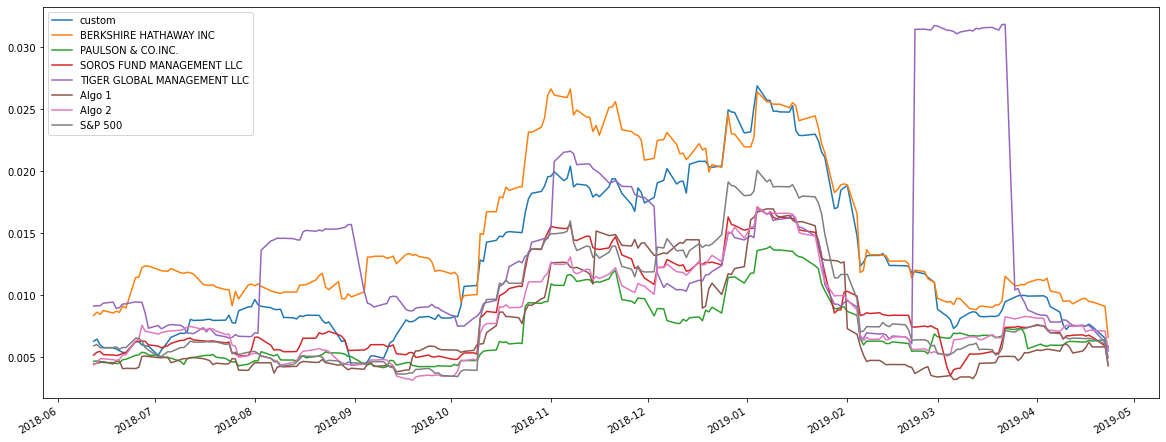

In [406]:
# Rolling
# YOUR CODE HERE

window = 21

rolling_std = combined_df.rolling(window=window).std().plot(figsize=(20, 8))

In [407]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

# What risk free rate do we assume?  The return of the S&P?  For now, Rf is assumed to be zero
# shapre ratio = annualized return - risk free rate / annualized std

risk_free = 0
sharpe_ratio_combined = ((combined_df.mean() * 252) - risk_free) / (combined_df.std() * np.sqrt(252))
sharpe_ratio_combined


custom                         0.933123
BERKSHIRE HATHAWAY INC         0.159756
PAULSON &amp; CO.INC.              0.258738
SOROS FUND MANAGEMENT LLC      0.430713
TIGER GLOBAL MANAGEMENT LLC   -1.034216
Algo 1                         2.035665
Algo 2                         0.080607
S&amp;P 500                        0.584820
dtype: float64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x20e0758ea00&gt;

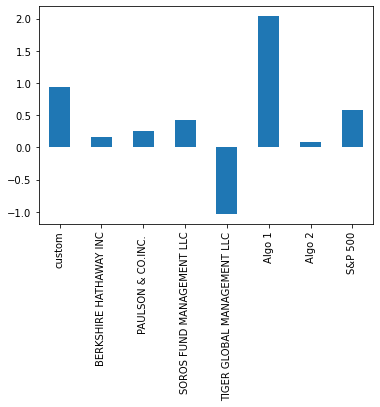

In [409]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratio_combined.plot(kind='bar')

,custom,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC,Algo 1,Algo 2,S&P 500
custom,1.000000,0.801158,0.644210,0.733250,0.391972,0.261471,0.739936,0.871875
BERKSHIRE HATHAWAY INC,0.801158,1.000000,0.650758,0.816675,0.325457,0.327000,0.782804,0.852303
PAULSON & CO.INC.,0.644210,0.650758,1.000000,0.791962,0.485375,0.361301,0.783656,0.766680
SOROS FUND MANAGEMENT LLC,0.733250,0.816675,0.791962,1.000000,0.478627,0.337826,0.862846,0.876981
TIGER GLOBAL MANAGEMENT LLC,0.391972,0.325457,0.485375,0.478627,1.000000,0.114554,0.409496,0.481030
Algo 1,0.261471,0.327000,0.361301,0.337826,0.114554,1.000000,0.365512,0.289358
Algo 2,0.739936,0.782804,0.783656,0.862846,0.409496,0.365512,1.000000,0.875721
S&P 500,0.871875,0.852303,0.766680,0.876981,0.481030,0.289358,0.875721,1.000000


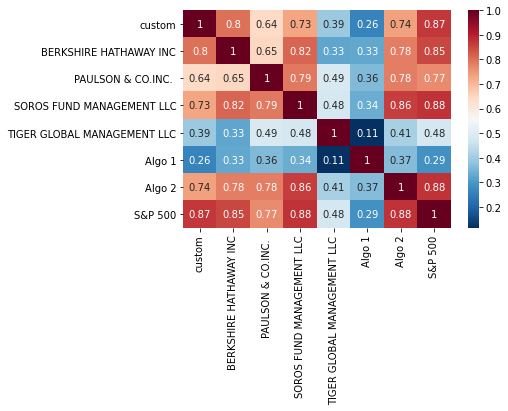

In [419]:
# Create a correlation analysis
# YOUR CODE HERE

corr_combined = combined_df.corr()
sns.heatmap(corr_combined, annot=True, cmap='RdBu_r')
corr_combined

&lt;matplotlib.axes._subplots.AxesSubplot at 0x20e06f41340&gt;

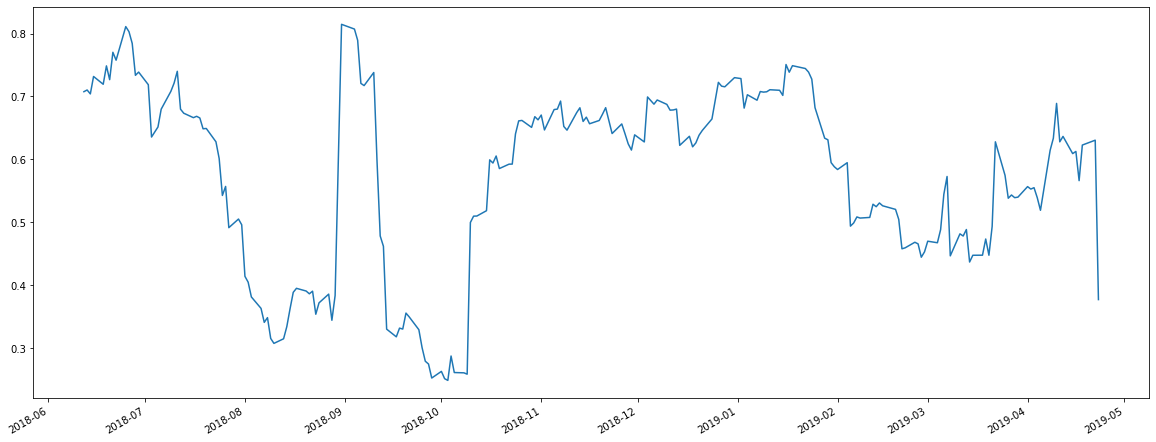

In [421]:
# Beta
# YOUR CODE HERE
window = 21

custom = combined_df['custom']
sp500 = combined_df['S&P 500']

roll_covariance_custom = custom.rolling(window=window).cov(sp500)
roll_variance_custom = custom.rolling(window=window).var()

roll_beta_custom = roll_covariance_custom / roll_variance_custom
roll_beta_custom.plot(figsize=(20, 8))